## Załadowanie potrzebnych bibliotek

Jeśli nie zostały dotychczas zainstalowane potrzebne pakiety, należy to obecnie zrobić, odkomentowujc i wykonujac poniższy kod

In [ ]:
#! pip install GromacsWrapper mdanalysis

Następnie należy załadować potrzebne biblioteki

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import MDAnalysis as mda
from MDAnalysis.analysis import rms, distances
from MDAnalysis.analysis.hydrogenbonds import HydrogenBondAnalysis

import gromacs

NOTE: Some configuration directories are not set up yet: 
	/Users/psmieja/.gromacswrapper
	/Users/psmieja/.gromacswrapper/qscripts
	/Users/psmieja/.gromacswrapper/templates
NOTE: You can create the configuration file and directories with:
	>>> import gromacs
	>>> gromacs.config.setup()


## Załadowanie topologi i trajektorii

In [2]:
universe = mda.Universe(f"./SYSTEM.gro", f"./md_0_200ns_fit.xtc")

In [21]:
lig_atomgroup = universe.select_atoms("resname JZ4")

In [22]:
lig_atoms = [a for a in lig_atomgroup]

In [23]:
lig_atoms

[<Atom 2615: H01 of type H of resname JZ4, resid 164 and segid SYSTEM>,
 <Atom 2616: H02 of type H of resname JZ4, resid 164 and segid SYSTEM>,
 <Atom 2617: H03 of type H of resname JZ4, resid 164 and segid SYSTEM>,
 <Atom 2618: H04 of type H of resname JZ4, resid 164 and segid SYSTEM>,
 <Atom 2619: H05 of type H of resname JZ4, resid 164 and segid SYSTEM>,
 <Atom 2620: H06 of type H of resname JZ4, resid 164 and segid SYSTEM>,
 <Atom 2621: H07 of type H of resname JZ4, resid 164 and segid SYSTEM>,
 <Atom 2622: H08 of type H of resname JZ4, resid 164 and segid SYSTEM>,
 <Atom 2623: H09 of type H of resname JZ4, resid 164 and segid SYSTEM>,
 <Atom 2624: H10 of type H of resname JZ4, resid 164 and segid SYSTEM>,
 <Atom 2625: H11 of type H of resname JZ4, resid 164 and segid SYSTEM>,
 <Atom 2626: H12 of type H of resname JZ4, resid 164 and segid SYSTEM>,
 <Atom 2627: C4 of type C of resname JZ4, resid 164 and segid SYSTEM>,
 <Atom 2628: C7 of type C of resname JZ4, resid 164 and segid SYS

In [28]:
lig_traj = []
for ts in universe.trajectory:
    lig_traj.append([atom.position for atom in lig_atoms])
lig_traj = np.array(lig_traj)

In [29]:
lig_traj.shape

(1092, 22, 3)

### RMSD od pocztatkowej pozycji dla atomów ligandu

In [31]:
lig_start_positions = lig_traj[0]

In [42]:
lig_rmsd_from_start = np.sqrt(
    np.mean(
        (lig_traj - lig_start_positions)**2,
        (1,2)
    )
)

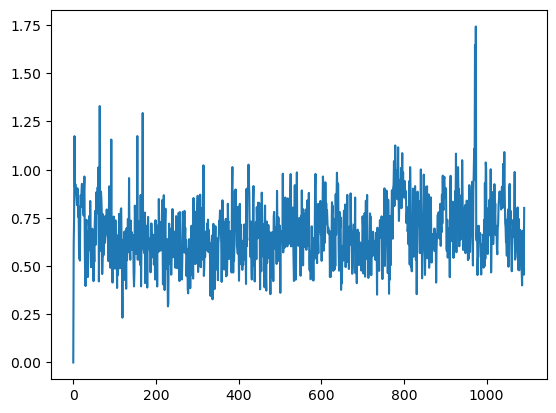

In [44]:
plt.plot(lig_rmsd_from_start)

## Energia oddziaływania

In [46]:
edr = mda.auxiliary.EDR.EDRReader(f"ie.edr")

/opt/miniconda3/envs/mol/lib/python3.10/site-packages/MDAnalysis/auxiliary/EDR.py:343: UserWarning: Could not find unit type for the following units: ['nm^3', 'kg/m^3']
  warnings.warn("Could not find unit type for the following "


In [53]:
edr.get_data()

{'Time': array([0.000e+00, 1.000e+02, 2.000e+02, ..., 1.089e+05, 1.090e+05,
        1.091e+05]),
 'Bond': array([2138.18457031, 2175.24682617, 2130.52954102, ..., 2047.22851562,
        2101.08374023, 2041.43334961]),
 'Angle': array([5388.01757812, 5268.38964844, 5145.15820312, ..., 5058.62060547,
        5369.98535156, 5202.00732422]),
 'Proper Dih.': array([8398.97460938, 8377.37695312, 8441.62011719, ..., 8387.56445312,
        8231.55175781, 8238.54882812]),
 'Per. Imp. Dih.': array([327.63214111, 324.65725708, 314.62918091, ..., 332.58752441,
        310.71798706, 344.87261963]),
 'LJ-14': array([2528.33666992, 2584.19897461, 2485.00244141, ..., 2471.90600586,
        2534.32568359, 2455.89013672]),
 'Coulomb-14': array([22036.45898438, 21861.66015625, 21961.78710938, ...,
        22208.015625  , 22296.85351562, 22221.13085938]),
 'LJ (SR)': array([45017.6484375 , 44867.        , 43756.19140625, ...,
        45257.7890625 , 43314.0078125 , 44380.41015625]),
 'Coulomb (SR)': array

In [48]:
ie =  edr.get_data(['LJ-SR:Protein-JZ4', 'Coul-SR:Protein-JZ4'])

In [50]:
ie

{'Time': array([0.000e+00, 1.000e+02, 2.000e+02, ..., 1.089e+05, 1.090e+05,
        1.091e+05]),
 'LJ-SR:Protein-JZ4': array([-95.12744141, -99.45152283, -94.9988327 , ..., -96.52057648,
        -82.47673798, -78.47711182]),
 'Coul-SR:Protein-JZ4': array([-31.59773445, -25.62992859, -23.68547058, ..., -15.02464676,
        -37.81612015, -25.79010201])}

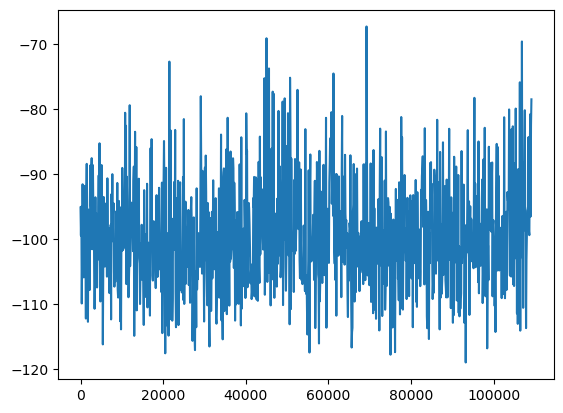

In [51]:
plt.plot(ie['Time'], ie[ 'LJ-SR:Protein-JZ4'])

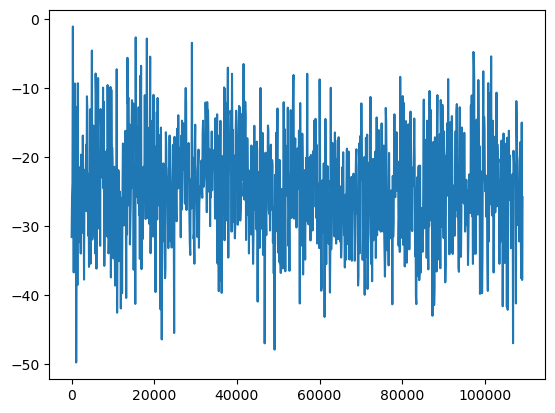

In [54]:
plt.plot(ie['Time'], ie['Coul-SR:Protein-JZ4'])

## Analiza wiazań wodorowych

In [56]:
gromacs.fileformats.xpm.XPM(f"./hbond.xpm", reverse=True)

XPM(filename='./hbond')

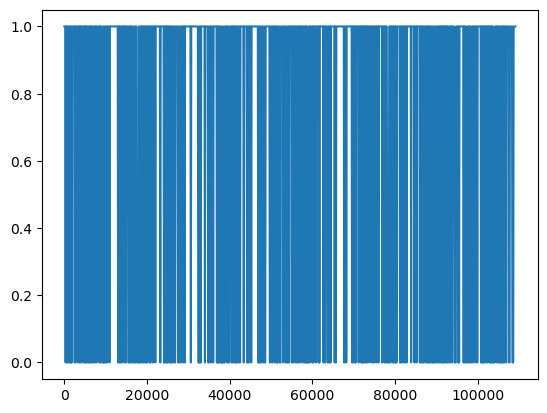

In [62]:
x,y,z = np.loadtxt("hbnum.xvg",comments=["@","#"],unpack=True)
plt.plot(x,y)

In [64]:
np.mean(z)

0.6071428571428571